In [20]:
import pandas as pd
from IPython.display import display

In [42]:
df = pd.read_csv('data/booksummaries.txt', delimiter='\t')
df.columns = ['WikipediaID', 'Freebase ID', 'Book title', 'Book author', 'Publication date', 'Genres', 'Plot summary']
df.drop(['WikipediaID', 'Freebase ID', 'Book author', 'Publication date'], inplace=True, axis=1)

df = df[df['Genres'].notna()]
df = df[~(df['Genres'].str.contains('hildren') & df['Genres'].str.contains('orror'))]
df = df[~(df['Genres'].str.contains('iction') & df['Genres'].str.contains('antasy'))]
df = df[~(df['Genres'].str.contains('iction') & df['Genres'].str.contains('ovel'))]

df.loc[df['Genres'].str.contains('hildren', na = False), 'Genres'] = 'Children'
df.loc[df['Genres'].str.contains('iction', na = False), 'Genres'] = 'Fiction'
df.loc[df['Genres'].str.contains('ovel', na = False), 'Genres'] = 'Novel'
df.loc[df['Genres'].str.contains('antasy', na = False), 'Genres'] = 'Fantasy' 
df.loc[df['Genres'].str.contains('ystery', na = False), 'Genres'] = 'Mystery'
df.loc[df['Genres'].str.contains('orror', na = False), 'Genres'] = 'Horror'

df = df[~(df['Genres'].str.contains('}'))]

df.dropna(subset = ['Genres'], inplace=True)
df.reset_index(drop=True, inplace=True)

,Book title,Genres,Plot summary
0,All Quiet on the Western Front,Novel,"The book tells the story of Paul Bäumer, a Ge..."
1,Blade Runner 3: Replicant Night,Fiction,"Living on Mars, Deckard is acting as a consul..."
2,Blade Runner 2: The Edge of Human,Fiction,Beginning several months after the events in ...
3,Children of Dune,Children,Nine years after Emperor Paul Muad'dib walked...
4,"Candide, ou l'Optimisme",Novel,"Candide contains thirty episodic chapters, wh..."
...,...,...,...
7975,Dark Angel,Fiction,After the events of Heaven (the first book in...
7976,Gates of Paradise,Fiction,"A novel about Annie Stonewall, the daughter o..."
7977,The Third Lynx,Fiction,The story starts with former government agent...
7978,Remote Control,Fiction,The series follows the character of Nick Ston...


<AxesSubplot:>

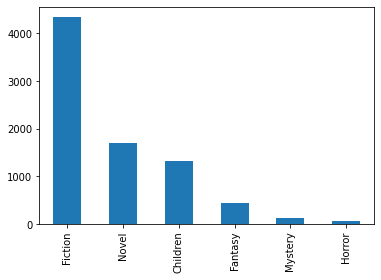

In [43]:
display(df)
df['Genres'].value_counts().plot(kind='bar')

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(stop_words='english')
word_count = vectorizer.fit_transform(df['Plot summary'])
tfidf_transformer = TfidfTransformer()
word_count_tfidf = tfidf_transformer.fit_transform(word_count)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(word_count_tfidf, df['Genres'], test_size=0.3)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

print(nb_classifier.score(X_test, y_test))

svm_classifier = SGDClassifier(loss='squared_hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None)

svm_classifier.fit(X_train, y_train)
print(svm_classifier.score(X_test, y_test))


0.5409356725146199
0.6528822055137845


In [33]:
from sklearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(df['Plot summary'], df['Genres'], test_size=0.3)

nb_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)
print(nb_pipeline.score(X_test, y_test))

svm_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None))
])

svm_pipeline.fit(X_train, y_train)
print(svm_pipeline.score(X_test, y_test))

0.5488721804511278
0.5806182121971596
